# Random Forest Algorithm 

What is Random Forest?
>Random Forest is a supervised learning algorithm and capable of performing both regression and classification tasks. As the name suggests, Random Forest algorithm creates a forest with a number of decision trees as shown below

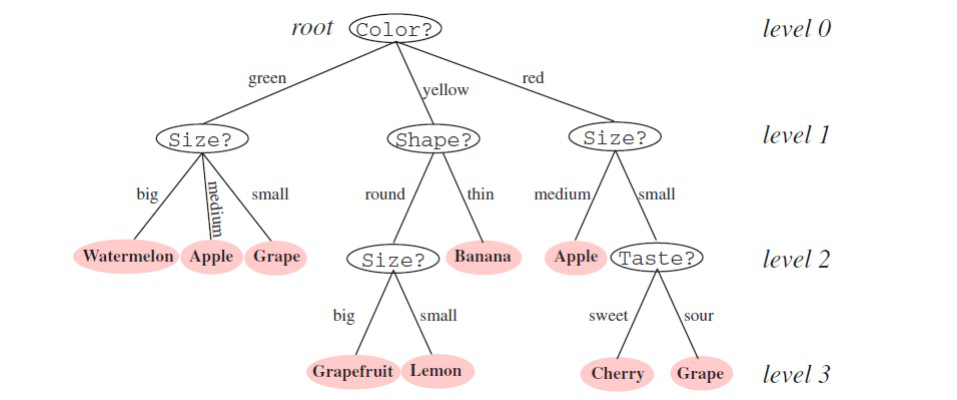

In [1]:
from IPython.display import Image as PImage
PImage("assets/Random_Forest/tree.png")

How does Random Forest work ?
>As we see, there is multiple decision trees as base learners. Each decision tree is given a subset of random samples from the data set (Thus, the name ‘Random’). The general idea of the ensemble methods is that a combination of learning models increases the overall result. We train each base learner (i.e Decision Tree) on a different sample of data and the sampling of data points happens with replacement.

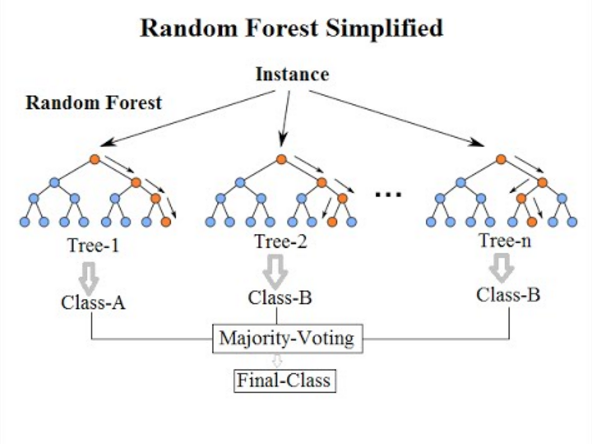

In [2]:
from IPython.display import Image as PImage
PImage("assets/Random_Forest/rf.png")

## Data Acqusition

In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('../data/titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Data Preparation:
    In this section, we are only 'cleaning' the dataset

In [6]:
# Drop the non-relevant features and rows having missing values

data.drop(['Name', 'Ticket', 'Fare', 'Cabin', 'PassengerId'], axis=1, inplace=True)
data.dropna(inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [7]:
# We need to one-hot encode the categorical features and ensure Numerical feature values

data = pd.get_dummies(data, columns=['Embarked'])
data.replace({'Sex':{'male':0,'female':1}}, inplace=True)
data = data.sample(frac=1, random_state=1337).reset_index(drop=True)       # Shuffle
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,0,2,0,66.0,0,0,0,0,1
1,1,2,1,48.0,1,2,0,0,1
2,0,3,0,21.0,0,0,0,0,1
3,0,3,1,14.0,0,0,0,0,1
4,1,3,0,16.0,0,0,0,0,1


In [8]:
# Split the training and validation data

train_labels = data['Survived'].values[:500]
train_data = data.drop('Survived', axis=1).values[:500]
valid_labels = data['Survived'].values[500:]
valid_data = data.drop('Survived', axis=1).values[500:]

## Import RF Classifier and other Evaluation Metrics

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, recall_score, precision_score

Let's discuss some key parameters of Random Forest Classifier:

`n_estimators` : The number of trees in the forest.

`criterion` : The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. (This parameter is tree-specific.)

`max_depth` : The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

`min_samples_split` : The minimum number of samples required to split an internal node

`min_samples_leaf` : The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

`min_weight_fraction_leaf` : The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

`max_features` : The number of features to consider when looking for the best split

`max_leaf_nodes` : Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

`random_state` : It is the seed used by the random number generator.

`class_weight` : Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.

## Establish Baseline

In [10]:
# Declare key parameters of classifier as Iterables

n_estimators = np.arange(3,25,2)
max_depth = np.arange(1,5,1)
criterion = ['gini', 'entropy']
min_samples_split = np.arange(2,6,1)
min_samples_leaf = np.arange(2,6,1)
random_state = [1337]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth, 
               'criterion': criterion,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'random_state': random_state}

print(random_grid)

{'n_estimators': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23]), 'max_depth': array([1, 2, 3, 4]), 'criterion': ['gini', 'entropy'], 'min_samples_split': array([2, 3, 4, 5]), 'min_samples_leaf': array([2, 3, 4, 5]), 'random_state': [1337]}


In [11]:
# Create Base Model for tuning
rf = RandomForestClassifier()

# Instantiate Random Search of Parameters using 3 fold cross validation
rf_random = RandomizedSearchCV(estimator=rf,
                               param_distributions=random_grid, 
                               n_iter=10, 
                               cv=4, 
                               random_state=137)

In [12]:
# Execute training (Fit the random search model)

rf_random.fit(train_data, train_labels) 
print('Done')

Done


In [13]:
# Checkout the best set of Parameters
rf_random.best_params_

{'random_state': 1337,
 'n_estimators': 9,
 'min_samples_split': 3,
 'min_samples_leaf': 4,
 'max_depth': 4,
 'criterion': 'entropy'}

In [14]:
# Get the best estimator
best_rf = rf_random.best_estimator_

In [15]:
# Get a list of predictions on test data for evaluation
predictions = list(best_rf.predict(valid_data))

print('Accuracy:', best_rf.score(valid_data, valid_labels))
print('Precision:', precision_score(list(valid_labels), predictions))
print('Recall:', recall_score(list(valid_labels), predictions))

Accuracy: 0.7641509433962265
Precision: 0.7777777777777778
Recall: 0.5764705882352941


## Try Feature Engineering
    Last time, we dropped the rows having missing values. 'Age' feature had a lot of missing values which caused us to lose those training instances. Let's try to impute those values using passengers' name.

In [16]:
# Load the raw data again

data = pd.read_csv('../data/titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
import re
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

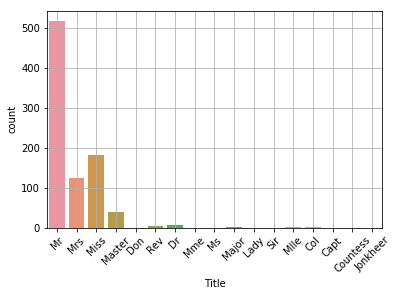

In [18]:
# Extract titles from name to impute missing values of Age

data['Title'] = data.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
sns.countplot(x='Title', data=data)
plt.xticks(rotation=45)
plt.grid()

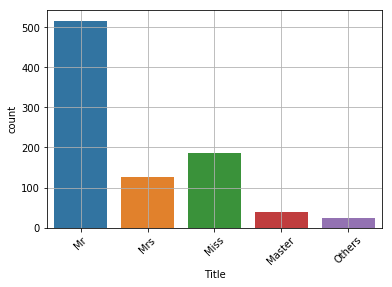

In [19]:
# Map Titles of other language to English, keep others as 'Others'

data['Title'] = data['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
data['Title'] = data['Title'].replace(['Don', 'Dona', 'Rev', 'Dr',
                                            'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'],'Others')
sns.countplot(x='Title', data=data)
plt.xticks(rotation=45)
plt.grid()

In [20]:
# Impute values of Age by Mean value of its class

for title in list(data.Title.unique()):
    data.loc[(data.Age.isnull() == True) & (data.Title == title), 'Age'] =  data.loc[data.Title == title, 'Age'].mean()

In [21]:
data = pd.get_dummies(data, columns=['Embarked'])
data.drop(['Cabin', 'Name', 'PassengerId', 'Ticket', 'Title'], axis=1, inplace=True)
data.Sex = data.Sex.map({'male':0,'female':1})
data = data.sample(frac=1, random_state=1338).reset_index(drop=True)      # Shuffle

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.4 KB


In [22]:
# Split the training and validation data

train_labels = data['Survived'].values[:600]
train_data = data.drop('Survived', axis=1).values[:600]
valid_labels = data['Survived'].values[600:]
valid_data = data.drop('Survived', axis=1).values[600:]

In [23]:
# Fit the new training data on best estimator
best_rf.fit(train_data, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=None,
            oob_score=False, random_state=1337, verbose=0,
            warm_start=False)

In [24]:
# Get a list of predictions on new test data and evaluate
predictions = list(best_rf.predict(valid_data))

print('Accuracy:', best_rf.score(valid_data, valid_labels))
print('Precision:', precision_score(list(valid_labels), predictions))
print('Recall:', recall_score(list(valid_labels), predictions))

Accuracy: 0.8144329896907216
Precision: 0.8372093023255814
Recall: 0.6428571428571429


## Try Hyperparameter Optimization using Grid Search

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
# Create the parameter grid for Grid Search

param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth, 
               'criterion': criterion,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'random_state': random_state}

# Create a base model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3, 
                           verbose = 1,
                           n_jobs=-1)

In [27]:
# Execute training (Fit the grid search model)
grid_search.fit(train_data, train_labels)

Fitting 3 folds for each of 1408 candidates, totalling 4224 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 155 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 2555 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 4224 out of 4224 | elapsed:   26.0s finished
/home/abhishek/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23]), 'max_depth': array([1, 2, 3, 4]), 'criterion': ['gini', 'entropy'], 'min_samples_split': array([2, 3, 4, 5]), 'min_samples_leaf': array([2, 3, 4, 5]), 'random_state': [1337]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [28]:
# Checkout the best set of Parameters
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 13,
 'random_state': 1337}

In [29]:
# Get the best estimator
best_gs = grid_search.best_estimator_

In [30]:
# Get a list of predictions on test data and evaluate
predictions = list(best_gs.predict(valid_data))

print('Accuracy:', best_gs.score(valid_data, valid_labels))
print('Precision:', precision_score(list(valid_labels), predictions))
print('Recall:', recall_score(list(valid_labels), predictions))

Accuracy: 0.8281786941580757
Precision: 0.8444444444444444
Recall: 0.6785714285714286


### Important Features

In [31]:
imp_feats = best_gs.feature_importances_

In [32]:
imp_feats

array([0.14969635, 0.48998966, 0.10561186, 0.02532968, 0.02615119,
       0.16432131, 0.01168154, 0.00070952, 0.02650889])

In [33]:
imp_dict = {}
x_cols = list(data.columns)[1:]
for i in range(len(imp_feats)):
    imp_dict[x_cols[i]]=round(imp_feats[i], 8)

In [34]:
sorted(imp_dict.items(), key=lambda x: x[1])

[('Embarked_Q', 0.00070952),
 ('Embarked_C', 0.01168154),
 ('SibSp', 0.02532968),
 ('Parch', 0.02615119),
 ('Embarked_S', 0.02650889),
 ('Age', 0.10561186),
 ('Pclass', 0.14969635),
 ('Fare', 0.16432131),
 ('Sex', 0.48998966)]

>`We can see Four features have significantly greater importance than others, i.e. Gender, Fare, Age and Class. The number of Siblings/Spouse or Parent/Child are not very relevant to determine the Survival; and same is the case with Embarkment.`

>`We can also use the feature importances to Select/Drop features. This helps in speeding up training/evaluation.`

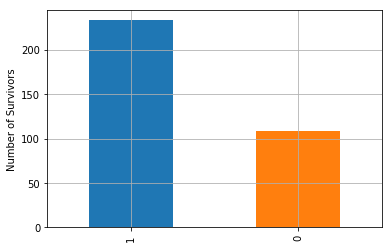

In [35]:
# Visualize how Gender is affecting the survival

data.loc[data.Survived==1,'Sex'].value_counts().plot(kind = 'bar')
plt.ylabel('Number of Survivors')
plt.grid()

>`We can see, the number of Female survivors is more than twice of that of Male survivors.`

## Few Pros and Cons of RF

Advantages:

     ● Handles higher dimensionality data very well.
     ● Random Forest algorithm avoids overfitting.
     ● For both classification and regression task, the same random forest algorithm can be used.

Disadvantages:

     ● Large number of trees can make the algorithm to slow and ineffective for real-time predictions.
     

## Other Ensemble Methods

Methods which combines several decision trees to produce better predictive performance than utilizing a single decision tree. The main principle behind the ensemble model is that a group of weak learners come together to form a strong learner.

Let’s talk about few techniques to perform ensemble decision trees:

>`Bagging` (Bootstrap Aggregation) is used when our goal is to reduce the variance of a decision tree. Here idea is to create several subsets of data from training sample chosen randomly with replacement. Now, each collection of subset data is used to train their decision trees. As a result, we end up with an ensemble of different models. Average of all the predictions from different trees are used which is more robust than a single decision tree.

>`Boosting` is another ensemble technique to create a collection of predictors. In this technique, learners are learned sequentially with early learners fitting simple models to the data and then analyzing data for errors. In other words, we fit consecutive trees (random sample) and at every step, the goal is to solve for net error from the prior tree.

There is another method which uses the concept of Ensemble Learning:

> `Stacking` also known as stacked generalization, is an ensemble method where the models are combined using another machine learning algorithm. The basic idea is to train machine learning algorithms with training dataset and then generate a new dataset with these models. Then this new dataset is used as input for the combiner machine learning algorithm.

### Visual Representation of Techniques discussed above

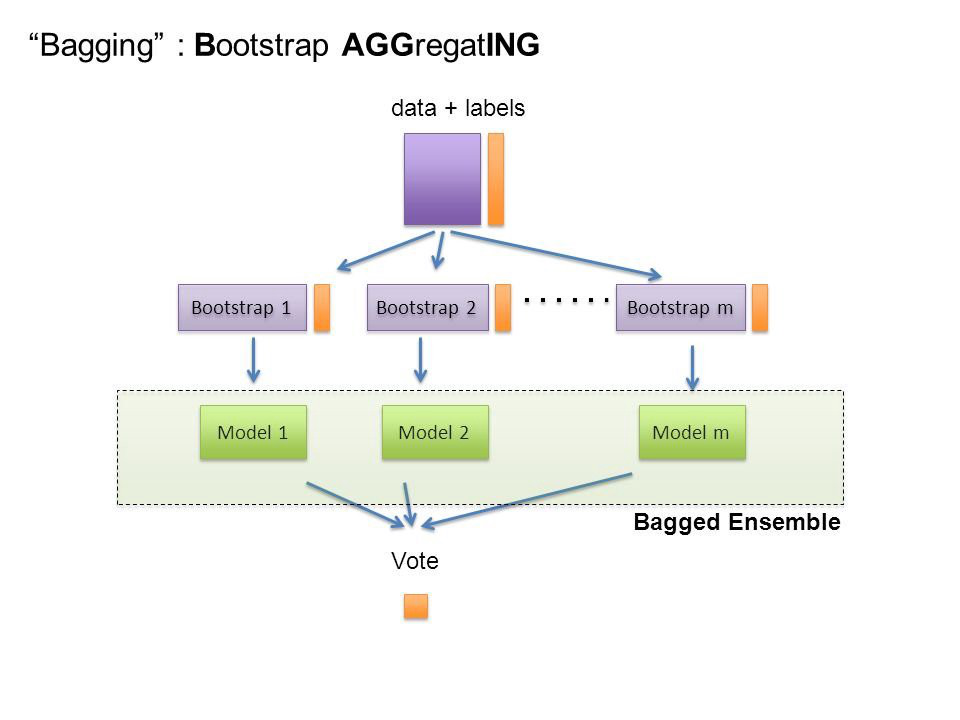

In [36]:
from IPython.display import Image
Image("assets/Random_Forest/bagging.png")

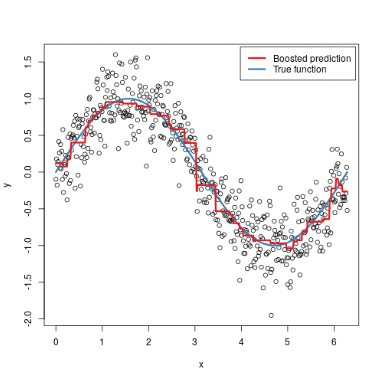

In [37]:
Image("assets/Random_Forest/boosting.png")

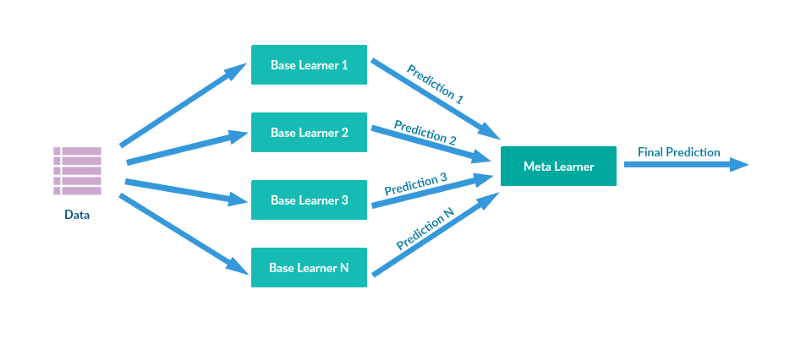

In [38]:
Image("assets/Random_Forest/stacking.png")

`To learn more about the Ensemble Learning, you can refer to following course/blogs.`

https://www.coursera.org/lecture/competitive-data-science/introduction-into-ensemble-methods-MJKCi

https://www.toptal.com/machine-learning/ensemble-methods-machine-learning

https://blog.statsbot.co/ensemble-learning-d1dcd548e936